In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from feed_forward import canteen_model, plot_training_set, plot_history, preprocess, normalize_dataset, calculate_optimized_parameters, predict_canteen_values

Using TensorFlow backend.


1.14.0


In [2]:
train_dataset, test_dataset, train_labels, test_labels = preprocess(pd.read_csv("../../data/ml_df.csv", index_col="date"))
normed_train_data, normed_test_data = normalize_dataset(train_dataset, test_dataset)

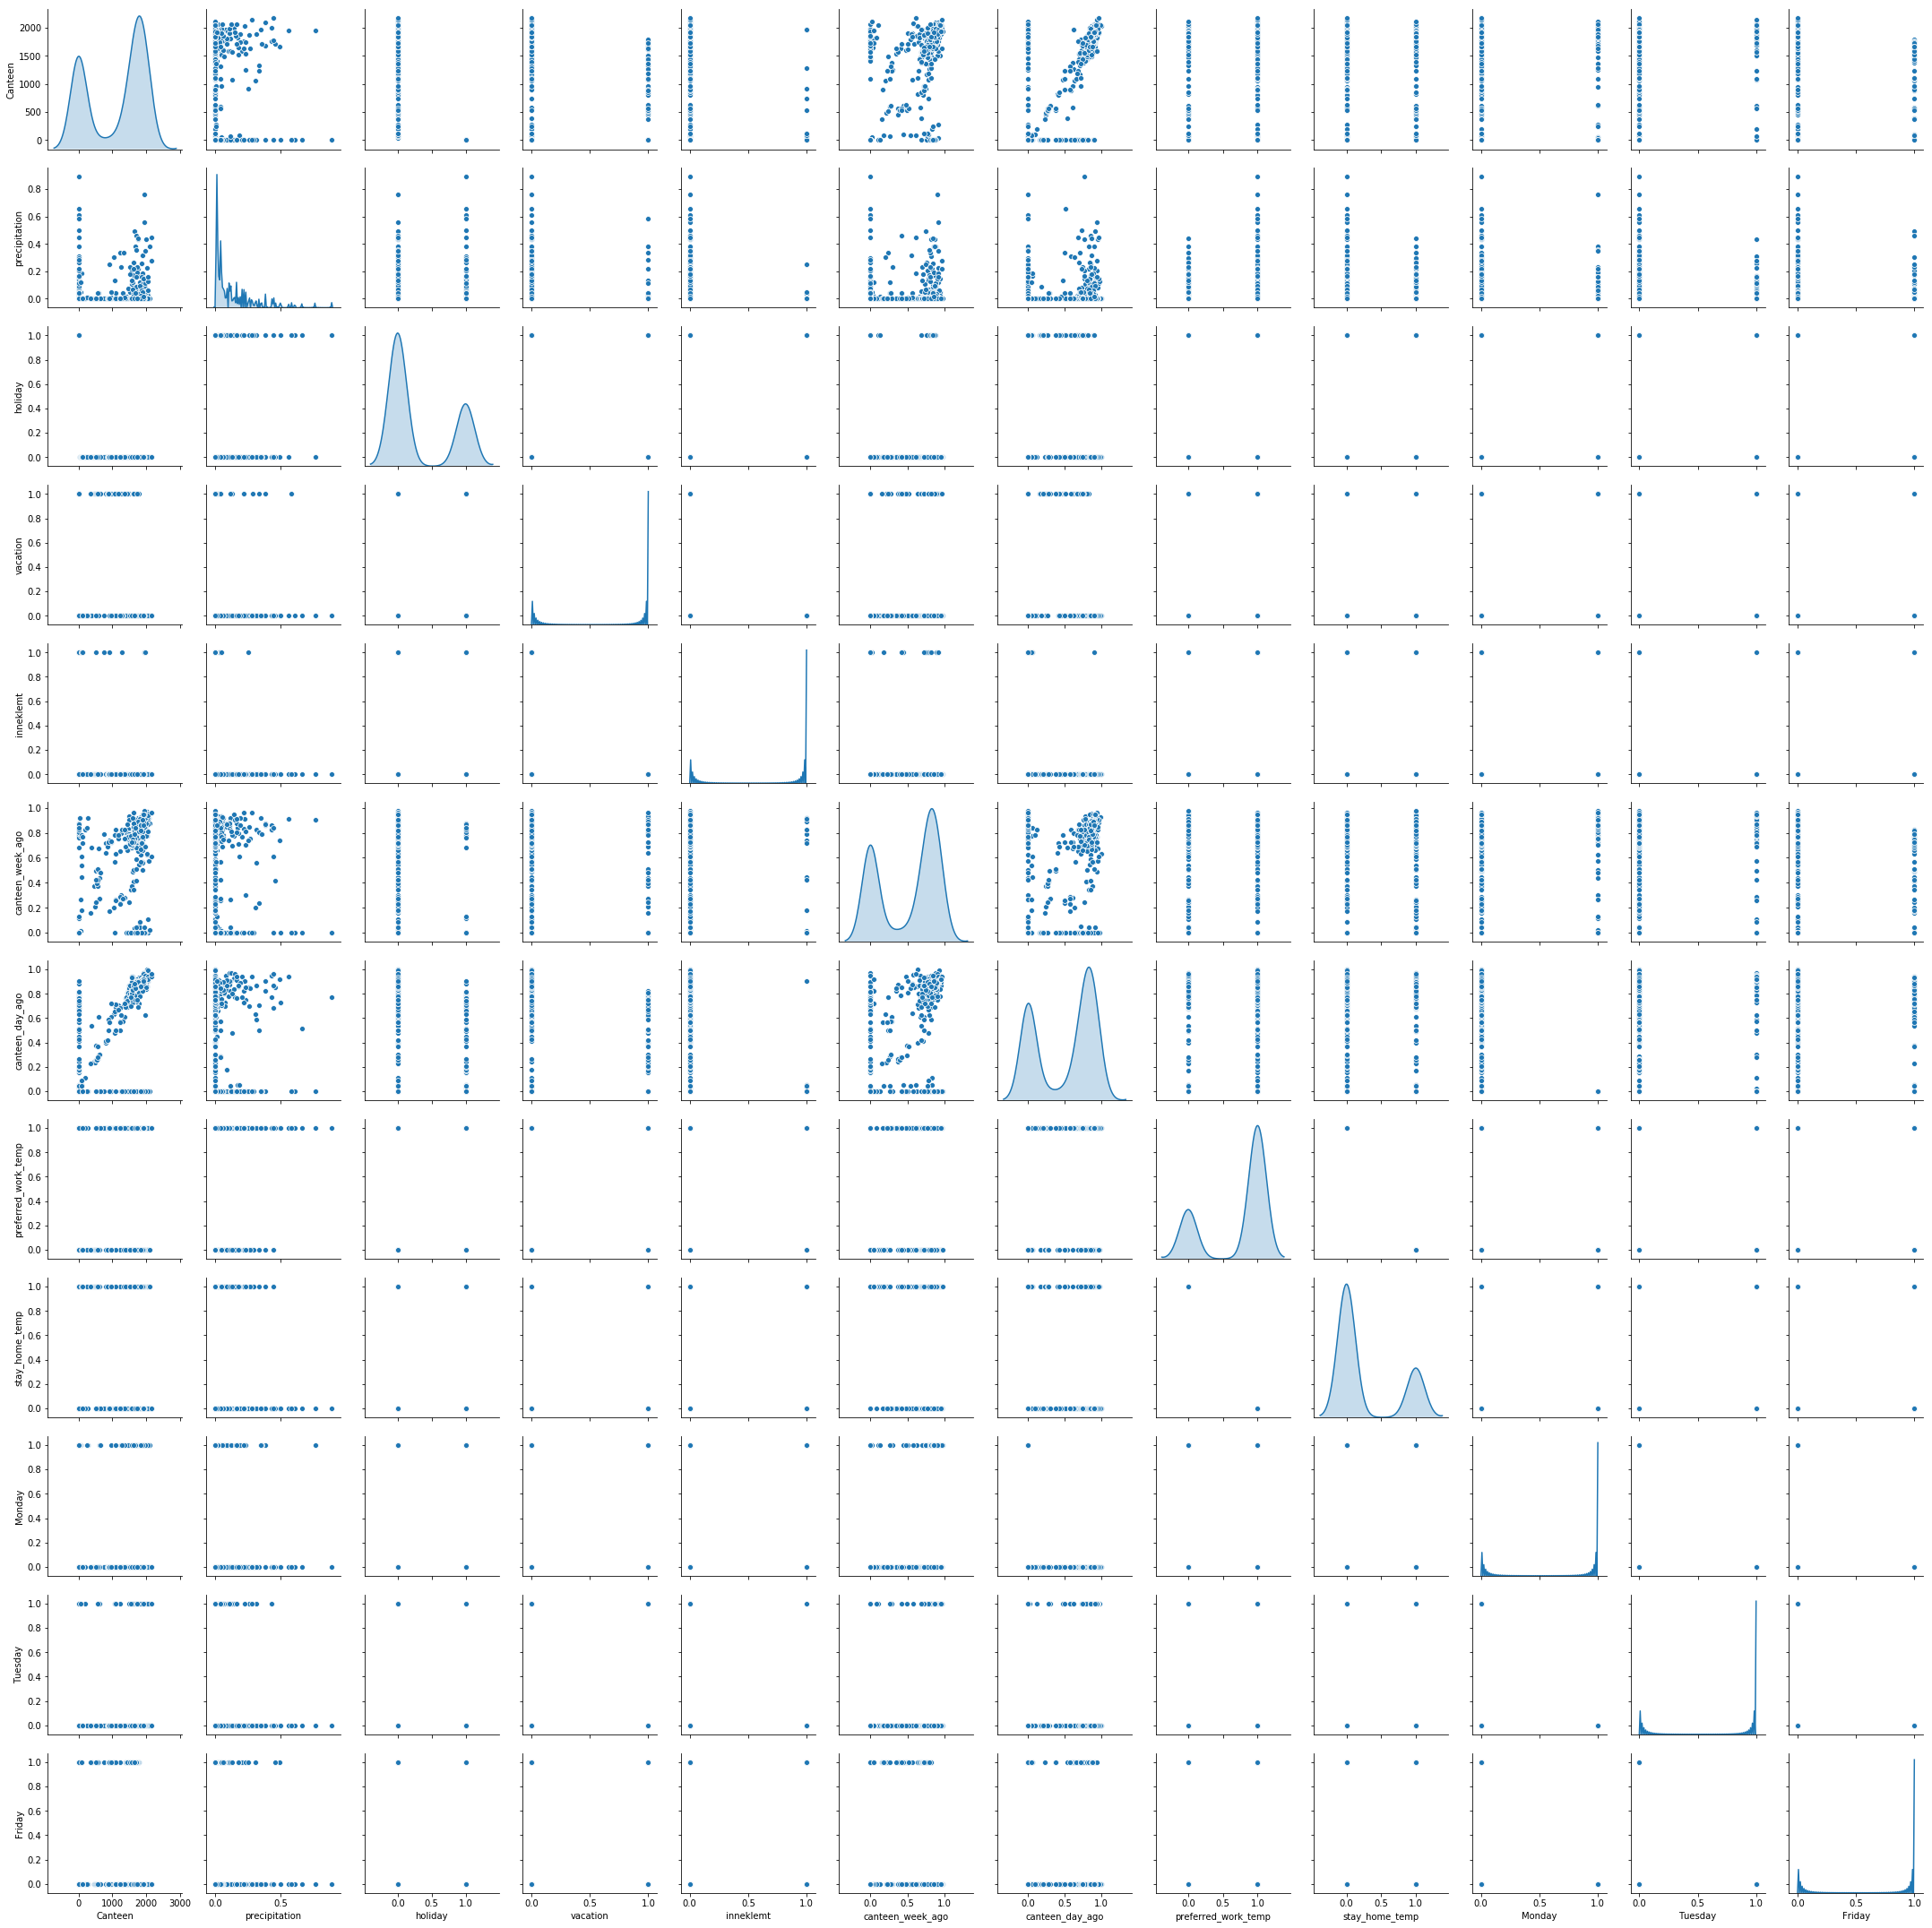

In [3]:
plot_training_set(pd.merge(train_labels,train_dataset, left_index=True, right_index=True))

In [4]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
precipitation,696.0,0.035223,0.099211,0.000000,0.000000,0.000000,0.010309,0.890034
holiday,696.0,0.318966,0.466411,0.000000,0.000000,0.000000,1.000000,1.000000
vacation,696.0,0.089080,0.285065,0.000000,0.000000,0.000000,0.000000,1.000000
inneklemt,696.0,0.021552,0.145319,0.000000,0.000000,0.000000,0.000000,1.000000
canteen_week_ago,696.0,0.509685,0.390973,-0.000462,0.000000,0.729870,0.847735,0.975018
canteen_day_ago,696.0,0.511118,0.393177,-0.000462,0.000000,0.733691,0.851404,1.000000
dist_start_year,696.0,0.510663,0.312102,0.002740,0.221233,0.517808,0.801095,1.000000
preferred_work_temp,696.0,0.729885,0.444338,0.000000,0.000000,1.000000,1.000000,1.000000
stay_home_temp,696.0,0.270115,0.444338,0.000000,0.000000,0.000000,1.000000,1.000000
Monday,696.0,0.145115,0.352470,0.000000,0.000000,0.000000,0.000000,1.000000


In [5]:
history, model = canteen_model(normed_train_data, train_labels)

W0703 20:01:44.736260 4618909120 deprecation.py:506] From /usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



....................................................................................................
..................................

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 34,881
Trainable params: 34,881
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Testing that model is working
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[-51.659622],
       [820.6073  ],
       [711.1423  ],
       [692.25006 ],
       [-36.366127],
       [ 55.34822 ],
       [701.50037 ],
       [852.53613 ],
       [942.74817 ],
       [140.7154  ]], dtype=float32)

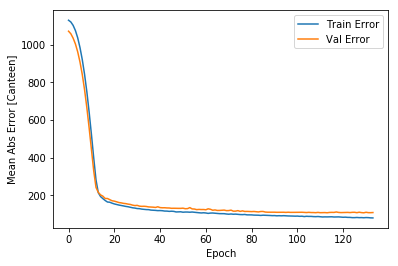

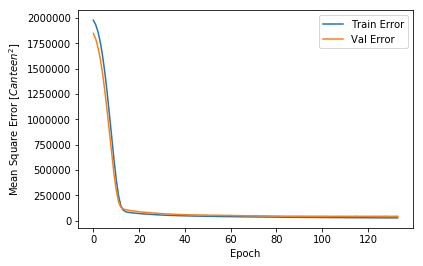

In [8]:
plot_history(history)

In [9]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
129,27857.713915,80.360664,27857.714844,43121.582478,106.621162,43121.585938,129
130,27833.449191,81.390854,27833.447266,43276.308203,109.377472,43276.308594,130
131,27626.018017,80.904793,27626.015625,43953.027846,107.453613,43953.027344,131
132,27718.583772,79.728897,27718.582031,43714.612054,107.317833,43714.609375,132
133,27768.981801,79.447578,27768.984375,43878.554911,108.000992,43878.558594,133


In [10]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} canteen visitors".format(mae))

Testing set Mean Abs Error: 108.57 canteen visitors


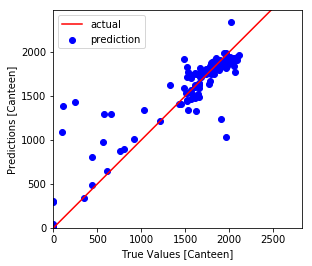

In [11]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(list(test_labels["Canteen"]), test_predictions, c='b', label="prediction")
plt.xlabel('True Values [Canteen]')
plt.ylabel('Predictions [Canteen]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-10000, 10000], [-10000, 10000], c='r', label="actual")
plt.legend(loc="best")
plt.show()

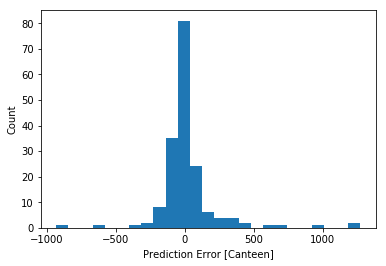

In [12]:
error = test_predictions - list(test_labels["Canteen"])
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Canteen]")
plt.ylabel("Count")
plt.show()

In [13]:
# Creates csv file with results from trying different parameters
# calculate_optimized_parameters(train_dataset, train_labels)

In [25]:
test_prediction = pd.read_csv("../../data/ml_df.csv", index_col="date")
res, canteen_dates = predict_canteen_values(test_prediction)


....................................................................................................
.........................................

In [26]:

canteen_dates['feed_forward_pred'] = res
canteen_dates = canteen_dates.drop(["Canteen"], axis=1)
canteen_dates

,feed_forward_pred
date,
2016-10-01,-25.182817
2016-10-02,4.332949
2016-10-03,609.940002
2016-10-04,1595.810425
2016-10-05,1585.017456
2016-10-06,1390.733887
2016-10-07,1012.097351
2016-10-08,42.084579
2016-10-09,-1.639844
